In [23]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os.path

def audio2spec(audio, sr=None):
    try:
        y, sr = librosa.load(audio,sr)
        if not (sr == 16000):
            raise SrError
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        print ("sample rate:", sr)
        print ("signal:",y.shape)
        print ("input:", S.shape)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_dB, sr=sr, fmax=8000)
        plt.tight_layout()
        plt.show()
    except SrError:
        print (audio + "'s sample rate isn't 16000")
    #plt.savefig(os.path.splitext(audio)[0]+'.jpg')

    return


sample rate: 16000
signal: (21120,)
input: (40, 42)


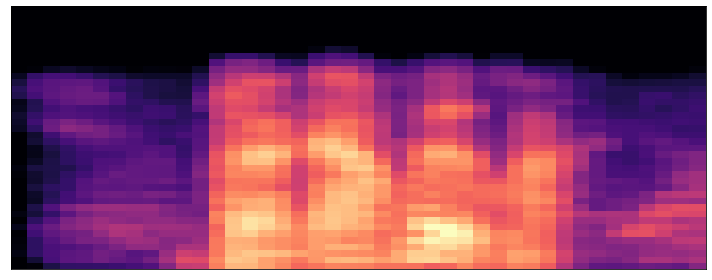

In [24]:
audio2spec('/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/labled/jsnx20191111/20191012231455347674.wav')

sample rate: 16000
signal: (157000,)
input: (40, 307)


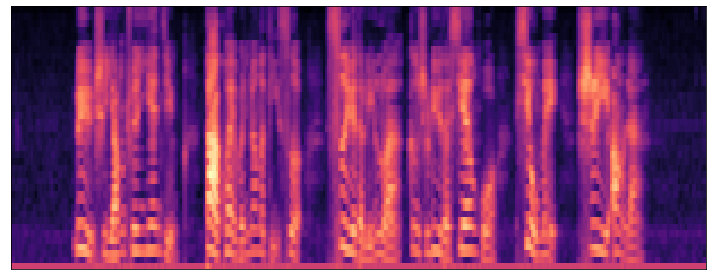

In [25]:
audio2spec('/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/labled/jy20191111/1555685553805.wav')

In [28]:
audio_path = '/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/labled/jy20191111/1555685553805.wav'
signal, sr = librosa.load(audio_path, sr=None)

In [30]:
def get_canonical_shape(signal):
    if len(signal.shape) == 1:
        return (1, signal.shape[0])
    else:
        return signal.shape

In [31]:
shape = get_canonical_shape(signal)

In [32]:
signal = np.reshape(signal, shape)

(1, 157000)

In [26]:
import re,shutil,os,codecs
def process_line(line):
    lst = re.split("[ \t]", line.strip())
    result = []
    for item in lst:
        if item == '':
            continue
        result.append(item)
    return result
#file='/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/VoiceClassification/data/label/(个人银行标签)label.txt'
data_path='../../labeled/data/'
source_path = '/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/labled/jsnx20191111/'
txt_cont = []
valid = 0
pre_path = '/Users/kinglog/Documents/learn/computer/研究生/融港语音识别/VoiceClassification/data/label/'
label_file = os.listdir(pre_path)
for file in label_file:
    if (not 'txt' in file):
        continue
    f = codecs.open(pre_path + file,'r',encoding='utf-8').readlines() 
    print (len(f))
    for line in f:
        lst = process_line(line)
        if (len(lst) == 3):  # 有效数据
            valid += 1
            target_path = data_path + lst[2]
            txt_cont.append(lst)

3715
3938


In [6]:
txt_cont

[['20191025144944187917.wav', '给张三转账一百元', '47'],
 ['20191025154241642167.wav', '像张三转账一百元', '47'],
 ['20191025094234413395.wav', '能安全设施', '209'],
 ['20191025095159591230.wav', '给张三转账一百元', '176'],
 ['20191025144150321531.wav', '给张三转账一百人', '21'],
 ['20191025142358225992.wav', '给张三转账一百元', '21'],
 ['20191025110649356430.wav', '给张三转账一百元', '21'],
 ['20191025094309272624.wav', '美团外卖', '185'],
 ['20191025101950226262.wav', '给张三转账一百元', '21'],
 ['20191025094302076965.wav', '版本信息', '247'],
 ['20191025144426470506.wav', '给张三转账一百元', '21'],
 ['20191025141602236746.wav', '像张三转账一百元', '21'],
 ['20191025155933355971.wav', '给张三转账一百元', '21'],
 ['20191025085929514261.wav', '嗯十二月转账', '21'],
 ['20191025152304733203.wav', '我要查询账户余额', '3'],
 ['20191025111023738332.wav', '给张三转账一百元', '21'],
 ['20191025085916379606.wav', '给张三转账', '21'],
 ['20191025142214946013.wav', '给张三转账一百元', '21'],
 ['20191025101050342138.wav', '给张三转账一百元', '21'],
 ['20191025094352699774.wav', '给张三转账一百元', '21'],
 ['20191025085910839512.wav', '给张

In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
#改变绘图风格
import seaborn as sns
sns.set(color_codes=True)


#class_count
classes = {}
for item in txt_cont:
    if not item[2] in classes.keys():
        classes[item[2]] = 1
    else:
        classes[item[2]] += 1



In [28]:
classes = sorted(classes.items(),key = lambda x:x[1],reverse = True)
classes

[('21', 1971),
 ('3', 410),
 ('168', 407),
 ('2', 235),
 ('1', 205),
 ('45', 179),
 ('4', 172),
 ('47', 171),
 ('102', 117),
 ('22', 112),
 ('104', 98),
 ('78', 88),
 ('234', 87),
 ('103', 84),
 ('147', 80),
 ('216', 71),
 ('208', 64),
 ('211', 61),
 ('80', 57),
 ('46', 56),
 ('146', 52),
 ('218', 47),
 ('164', 42),
 ('213', 41),
 ('49', 41),
 ('76', 39),
 ('247', 37),
 ('73', 35),
 ('51', 34),
 ('0', 33),
 ('36', 31),
 ('9', 29),
 ('246', 29),
 ('190', 29),
 ('105', 28),
 ('52', 27),
 ('92', 27),
 ('245', 26),
 ('48', 25),
 ('185', 25),
 ('26', 24),
 ('226', 22),
 ('57', 22),
 ('165', 21),
 ('237', 21),
 ('20', 20),
 ('209', 20),
 ('160', 19),
 ('203', 19),
 ('77', 19),
 ('35', 17),
 ('89', 17),
 ('34', 17),
 ('129', 17),
 ('219', 17),
 ('24', 16),
 ('117', 15),
 ('175', 15),
 ('11', 15),
 ('235', 15),
 ('72', 15),
 ('50', 14),
 ('217', 14),
 ('242', 13),
 ('6', 13),
 ('145', 12),
 ('14', 12),
 ('106', 12),
 ('210', 11),
 ('54', 11),
 ('37', 11),
 ('18', 10),
 ('25', 10),
 ('182', 10)

In [29]:
data = [['class','num']]
for item in classes:
    data.append([item[0],item[1]])

In [30]:
data

[['class', 'num'],
 ['21', 1971],
 ['3', 410],
 ['168', 407],
 ['2', 235],
 ['1', 205],
 ['45', 179],
 ['4', 172],
 ['47', 171],
 ['102', 117],
 ['22', 112],
 ['104', 98],
 ['78', 88],
 ['234', 87],
 ['103', 84],
 ['147', 80],
 ['216', 71],
 ['208', 64],
 ['211', 61],
 ['80', 57],
 ['46', 56],
 ['146', 52],
 ['218', 47],
 ['164', 42],
 ['213', 41],
 ['49', 41],
 ['76', 39],
 ['247', 37],
 ['73', 35],
 ['51', 34],
 ['0', 33],
 ['36', 31],
 ['9', 29],
 ['246', 29],
 ['190', 29],
 ['105', 28],
 ['52', 27],
 ['92', 27],
 ['245', 26],
 ['48', 25],
 ['185', 25],
 ['26', 24],
 ['226', 22],
 ['57', 22],
 ['165', 21],
 ['237', 21],
 ['20', 20],
 ['209', 20],
 ['160', 19],
 ['203', 19],
 ['77', 19],
 ['35', 17],
 ['89', 17],
 ['34', 17],
 ['129', 17],
 ['219', 17],
 ['24', 16],
 ['117', 15],
 ['175', 15],
 ['11', 15],
 ['235', 15],
 ['72', 15],
 ['50', 14],
 ['217', 14],
 ['242', 13],
 ['6', 13],
 ['145', 12],
 ['14', 12],
 ['106', 12],
 ['210', 11],
 ['54', 11],
 ['37', 11],
 ['18', 10],
 ['25'